In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

accidents = pd.read_csv("D:/vscode/vscode_python/feature_engineering/data/accidents.csv")
autos = pd.read_csv("D:/vscode/vscode_python/feature_engineering/data/autos.csv")
concrete = pd.read_csv("D:/vscode/vscode_python/feature_engineering/data/concrete.csv")
customer = pd.read_csv("D:/vscode/vscode_python/feature_engineering/data/customer.csv")

# 数字变换

In [3]:
autos["stroke_ratio"]=autos.stroke/autos.bore

autos[["stroke","bore","stroke_ratio"]].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


In [4]:
autos["displacement"]=(np.pi*((0.5*autos.bore)**2)*autos.stroke*autos.num_of_cylinders)

<Axes: xlabel='LogWindSpeed', ylabel='Density'>

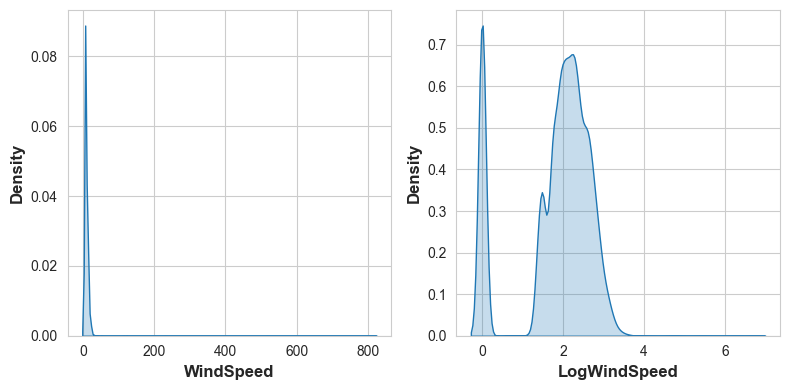

In [5]:
accidents["LogWindSpeed"]=accidents.WindSpeed.apply(np.log1p)
#对WindSpeed这一列的每个数据取对数，因为可能包含0，所以不用log
"""对数变换的优点：
1.处理偏斜分布：某些数据分布是偏斜的，也就是数据中的值不是均匀地分布在整个范围内。对数变换有助于减小极端值对分布的影响，从而使数据更接近正态分布。

2.稳定性：对数变换可以使数据更加稳定，减小方差，并使其更适合用于某些统计和建模方法。对数变换有助于减小离群值的影响，因为它可以将大幅度的变化缩小，使数据更加集中在一个范围内。

3.线性关系：在一些情况下，对数变换可以使数据更加线性，这对于某些线性建模方法非常有用。

4.数据缩放：对数变换可以将数据进行缩放，从而更好地适应模型。例如，在回归模型中，对数变换可以将响应变量的范围缩小，使模型更容易训练。"""

fig,axs=plt.subplots(1,2,figsize=(8,4))
#fig:包含两个子图的图形对象；axs:两个子图储存在axs列表中。通过参数指定在哪个子图上绘制

sns.kdeplot(accidents.WindSpeed,fill=True,ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed,fill=True,ax=axs[1])
#绘制kde图

# 计数

1.描述某物存在与否的特征通常成组，因此需要通过计数来聚合要素；2.这些特征功能是二进制的(1与0)，或布尔型(True与False)。Python中，布尔值可以像整数一样相加;

In [6]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]

accidents["RoadwayFeatures"]=accidents[roadway_features].sum(axis=1)
#横向将各个特征相加得到和，使用.sum()方法

accidents[roadway_features+["RoadwayFeatures"]].head(10)
#将最后的一列加入到其中

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


In [7]:
#可以使用DataFrame中的内置函数great-than,即gt方法来计算分量
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete["Components"]=concrete[components].gt(0).sum(axis=1)
"""gt()中的0，即为应该大于的数"""

concrete[components+["Components"]].head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5


# 构建和分解功能

分解：

In [3]:
customer[["Type","Level"]]=(customer["Policy"].str.split(" ",expand=True))
#将Policy每一列的各个字符串按照空格切割，前后分别返回给Type和Level参数组成两组新列
"""expand=True直接将分割后的转化为DataFrame而不是Series"""

customer[["Policy","Type","Level"]].head()
#将这三列组合到一起打印

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1


构建：

In [4]:
autos["make_and_style"]=autos["make"]+"_"+autos["body_style"]
#直接相加和

autos[["make","body_style","make_and_style"]].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


# 分组变换

组转换：聚集按类别分组的多个行的信息(类别交互入手)

使用聚合函数，组变换将两个要素聚合在一起：1.提供分组的分类要素；2.聚合其值。State分组功能；mean聚合函数；Income聚合功能；groupby和transform

In [4]:
customer["AverageIncome"]=(
    customer.groupby("State") #按State分组
    ["Income"] #提取出Income这一组
    .transform("mean") #计算平均值
)

customer[["State","Income","AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


mean()函数为DataFrame内置的方法，可以将其作为字符串传递给transform;其他的一些方法还有max,min,median,var,std,count

In [5]:
customer["StateFreq"]=(
    customer.groupby("State") #按State分组
    ["State"] #提取State这一组
    .transform("count") #计算每个出现次数
    /customer.State.count() #除以State一共的数量，即每个State的出现频率(频率编码)
)

customer[["State","StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


如果使用训练和测试拆分，为了保持其独立性，最好仅使用训练集创建分组特征，然后将其联接到测试集

In [8]:
df_train=customer.sample(frac=0.5) #将数据集的一半划分给训练集
df_valid=customer.drop(df_train.index) #将数据的另一半(删除了训练集数据之后)划分给测试集

df_train["AverageClaim"]=df_train.groupby("Coverage")["ClaimAmount"].transform("mean")
#按Coverage分组，提取ClaimAmount这一列，计算平均值

df_valid=df_valid.merge(
    df_train[["Coverage","AverageClaim"]]
    .drop_duplicates(), #删除重复行
    on="Coverage", #以Coverage列开始连接
    how="left",
)

df_valid[["Coverage","AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Basic,381.554738
1,Basic,381.554738
2,Basic,381.554738
3,Basic,381.554738
4,Extended,483.250754
5,Basic,381.554738
6,Premium,650.446070
7,Basic,381.554738
8,Basic,381.554738
9,Basic,381.554738


# 关于创建特征的提示

1.线性模型可以自然的学习和差，但不能学习更复杂的东西；2.对大多数模型来说，比率似乎更难学习，比率组合会带来一些简单的性能提升；3.线性模型和神经网络在归一化特征表现更好；4.树模型近乎可以学习任何特征组合，但当组合特别重要时，它们仍然可以从显式创建该组合中受益，尤其对于数有限时；5.计数对树模型尤其有用，因为这些模型没有一种自然的方法来同时聚合多个特征之间的信息